In [ ]:
import pandas as pd

## Datos:
* CCB
* Dane consumo
* Galerías?
* ArtNet
Hoy: **datos de egresados de arte**

## Carga de datos

In [ ]:
excel = pd.ExcelFile('BD Alumni Artes 28012025.xlsb')
hojas = excel.sheet_names

In [ ]:
hojas

['Alumni únicos', 'Alumni con Títulos']

In [ ]:
alumniUnicos = pd.read_excel('BD Alumni Artes 28012025.xlsb', sheet_name='Alumni únicos')

## Primer vistazo a los datos

In [ ]:
alumniUnicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     1464 non-null   object 
 1   Fallecido                              1464 non-null   int64  
 2   Género                                 1464 non-null   object 
 3   Fecha de nacimiento                    1418 non-null   float64
 4   Edad                                   1418 non-null   float64
 5   Generación                             1418 non-null   object 
 6   Estrato                                1223 non-null   float64
 7   Estado Civil                           1380 non-null   object 
 8   Número de Títulos Formales             1464 non-null   int64  
 9   Número de Títulos No formales          1464 non-null   int64  
 10  Nivel Banner                           1464 non-null   object 
 11  Grad

In [ ]:
alumniUnicos.columns

Index(['ID', 'Fallecido', 'Género', 'Fecha de nacimiento', 'Edad',
       'Generación', 'Estrato', 'Estado Civil', 'Número de Títulos Formales',
       'Número de Títulos No formales', 'Nivel Banner',
       'Grado: Tipo de registro', 'Nombre Departamento', 'Nombre Facultad',
       'Programa', 'Título', 'Fecha grado', 'Período de grado',
       'Nivel Jerárquico', 'Cargo', 'Empleador', 'Sector', 'Rango Salarial',
       'Fecha actualización Rango Salarial', 'País de residencia',
       'Departamento o Estado de residencia', 'Ciudad de residencia',
       'País Laboral', 'Departamento o Estado Laboral', 'Ciudad Laboral',
       'Fecha actualización datos primarios',
       'Fecha actualización datos secundarios',
       'Fecha actualización datos laborales', 'Administrativo', 'Profesor',
       'Profesor/Administrativo retirado', 'Padre/madre de Alumni'],
      dtype='object')

In [ ]:
alumniUnicos[['Fecha grado', 'Programa', 'Título']].head()

,Fecha grado,Programa,Título
0,40775,ARTE,Maestra en Arte. Concentración: Medios Electró...
1,40775,ARTE,Maestra en Arte. Concentración: Historia y Teo...
2,44439,ARTE,Maestra en Arte
3,40775,ARTE,Maestra en Arte. Concentraciones: Artes Plásti...
4,40775,ARTE,Maestra en Arte. Concentraciones: Artes Plásti...


In [ ]:
alumniUnicos['Programa'].value_counts()

Programa
ARTE                 1041
ARTES PLASTICAS       230
HISTORIA DEL ARTE     124
BELLAS ARTES           69
Name: count, dtype: int64

In [ ]:
alumniUnicos['Fecha grado'] = pd.to_datetime(alumniUnicos['Fecha grado'],origin='1899-12-30', unit='D')

In [ ]:
import seaborn as sns

<Axes: xlabel='Fecha grado', ylabel='Programa'>

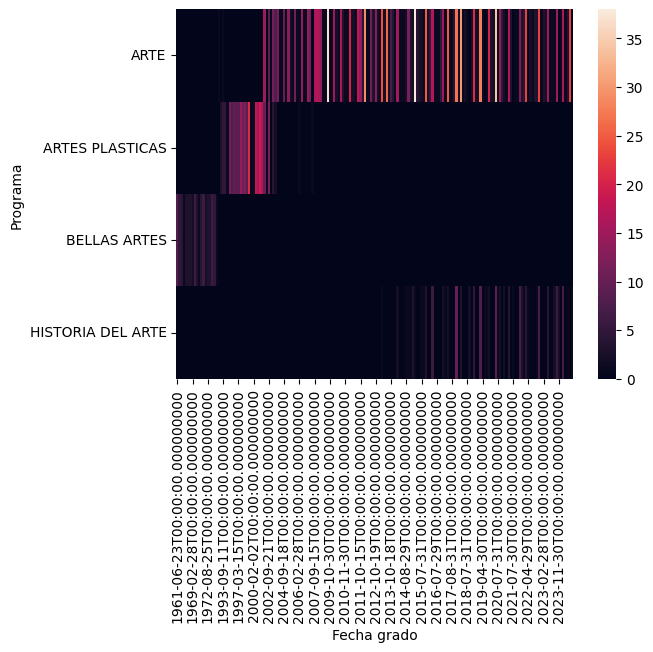

In [ ]:
sns.heatmap(pd.crosstab(alumniUnicos['Programa'], alumniUnicos['Fecha grado']))

**NOTA**: Observamos que a lo largo del tiempo el programa de arte se ha llamado de diferentes formas, sólo se van a filtrar los datos de Historia del arte.

In [ ]:
datosArtistas = alumniUnicos[alumniUnicos['Programa']!='HISTORIA DEL ARTE'].copy()
datosArtistas['Programa'].value_counts()

Programa
ARTE               1041
ARTES PLASTICAS     230
BELLAS ARTES         69
Name: count, dtype: int64

In [ ]:
datosArtistas['Fecha actualización Rango Salarial'] = pd.to_datetime(alumniUnicos['Fecha actualización Rango Salarial'],origin='1899-12-30', unit='D')

<Axes: xlabel='Fecha grado', ylabel='count'>

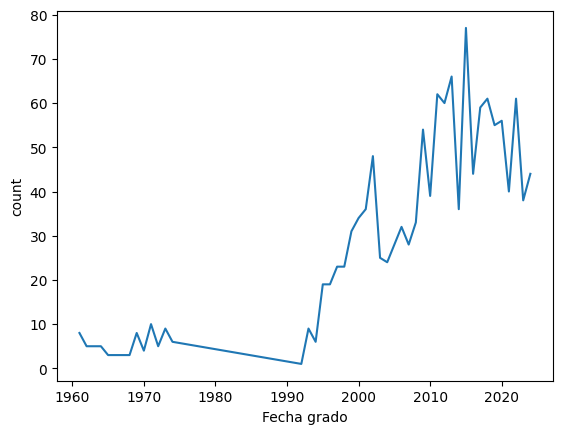

In [ ]:
sns.lineplot(datosArtistas['Fecha grado'].dt.year.value_counts().sort_index())

In [ ]:
datosArtistas[['Nivel Jerárquico']].value_counts(normalize=True)

Nivel Jerárquico     
Profesional              0.510682
Ejecutivo                0.137335
Desempleado              0.124110
Independiente            0.101729
Directivo                0.047813
No clasificado           0.047813
Soporte                  0.017294
Jubilado o Pensionado    0.013225
Name: proportion, dtype: float64

## Porcentaje de egresados por género

In [ ]:
datosArtistas['Género'].value_counts()

Género
Femenino     933
Masculino    407
Name: count, dtype: int64

In [ ]:
datosArtistas['Género'].value_counts(normalize=True)

Género
Femenino     0.696269
Masculino    0.303731
Name: proportion, dtype: float64

## Zoom en estas categorías:
- Género
- Qué están haciendo

In [ ]:
pd.crosstab(datosArtistas['Nivel Jerárquico'], datosArtistas['Género'], normalize='index')

Género,Femenino,Masculino
Nivel Jerárquico,,
Desempleado,0.680328,0.319672
Directivo,0.808511,0.191489
Ejecutivo,0.644444,0.355556
Independiente,0.720000,0.280000
Jubilado o Pensionado,0.923077,0.076923
No clasificado,0.617021,0.382979
Profesional,0.677291,0.322709
Soporte,0.705882,0.294118


**Esto es**: De los egresados, cuál es el procentaje de mujeres vs hombres.

**Lo que queremos es:** </br>
De las mujeres, cuál es el procentaje de _________ </br>
Compararlo contra "De los hombres, cuál es ese porcentaje de__________" </br>

In [ ]:
artistasMujeres = datosArtistas[datosArtistas['Género']=='Femenino']
artistasHombres = datosArtistas[datosArtistas['Género']=='Masculino']
print(artistasMujeres.shape)
print(artistasHombres.shape)

(933, 37)
(407, 37)


In [ ]:
artistasMujeres['Nivel Jerárquico'].value_counts(normalize=True)*100

Nivel Jerárquico
Profesional              50.520059
Ejecutivo                12.927192
Desempleado              12.332838
Independiente            10.698366
Directivo                 5.646360
No clasificado            4.309064
Soporte                   1.783061
Jubilado o Pensionado     1.783061
Name: proportion, dtype: float64

In [ ]:
artistasHombres['Nivel Jerárquico'].value_counts(normalize=True)*100

Nivel Jerárquico
Profesional              52.258065
Ejecutivo                15.483871
Desempleado              12.580645
Independiente             9.032258
No clasificado            5.806452
Directivo                 2.903226
Soporte                   1.612903
Jubilado o Pensionado     0.322581
Name: proportion, dtype: float64

**En este momento tenemos** </br>
- datosArtistas: filtrando historia del arte </br>
- artistasHombres </br>
- artistasMujeres

In [ ]:
datosArtistas['Cargo'].value_counts()

Cargo
INDEPENDIENTE                       98
DESEMPLEADO                         91
DOCENTE                             54
ARTISTA                             49
ESTUDIANTE                          26
                                    ..
CONSULTORA EN PEDAGOGIA Y GENERO     1
INSTRUCTORA ARTISTA                  1
ELEMENTARY ART TEACHER               1
PROFESIONAL PEDAGOGICA               1
DIRECTORA ACADEMICA                  1
Name: count, Length: 506, dtype: int64

In [ ]:
datosArtistas['Sector'].value_counts()

Sector
No identificado                                                                                618
V- OTROS                                                                                       423
P -EDUCACIÓN                                                                                    84
M -ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS                                            39
J -INFORMACIÓN Y COMUNICACIONES                                                                 30
G -COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS     27
R -ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN                                      27
C -INDUSTRIAS MANUFACTURERAS                                                                    15
K -ACTIVIDADES FINANCIERAS Y DE SEGUROS                                                         13
S -OTRAS ACTIVIDADES DE SERVICIOS                                                               12
O -

**Nos interesan** </br>
R -ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN </br>
V- OTROS

In [ ]:
def verNivelesJerarquicosDelSector(pSector):
    print('En el sector: ', pSector)
    print('Hombres:')
    print('')
    artistasHombresDelSector = artistasHombres[artistasHombres['Sector'] == pSector]
    print('Artistas hombres del sector', artistasHombresDelSector.shape)
    display(artistasHombresDelSector['Nivel Jerárquico'].value_counts(normalize=True)*100)
    print('')
    print('Mujeres:')
    print('')
    artistasMujeresDelSector = artistasMujeres[artistasMujeres['Sector'] == pSector]
    print('Artistas mujeres del sector', artistasMujeresDelSector.shape)
    display(artistasMujeresDelSector['Nivel Jerárquico'].value_counts(normalize=True)*100)

In [ ]:
verNivelesJerarquicosDelSector('R -ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN')

En el sector:  R -ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN
Hombres:

Artistas hombres del sector (8, 37)


Nivel Jerárquico
Directivo         37.5
Profesional       25.0
Ejecutivo         12.5
No clasificado    12.5
Soporte           12.5
Name: proportion, dtype: float64


Mujeres:

Artistas mujeres del sector (19, 37)


Nivel Jerárquico
Profesional       68.421053
Ejecutivo         21.052632
No clasificado     5.263158
Soporte            5.263158
Name: proportion, dtype: float64

## Tratando de identificar a los egresados/as que se dedican al arte

In [ ]:
for etiqueta in datosArtistas['Cargo'].value_counts().index:
    print(etiqueta)

INDEPENDIENTE
DESEMPLEADO
DOCENTE
ARTISTA
ESTUDIANTE
GERENTE
NO DISPONIBLE
AFILIACIONES
PENSIONADO
ARTISTA PLASTICA
GERENTE GENERAL
PROFESORA
PROFESOR
ARTISTA PLASTICO
CONTRATISTA
PROFESIONAL
DOCENTE DE ARTES
FUNDADORA
PENSIONADA
DUEÑA
DIRECTORA
PROFESORA ASOCIADA
DISEÑADOR
DIRECTOR CREATIVO
DESEMPLEADA
ASISTENTE
FUNDADOR
DIRECTORA CREATIVA
DISEÑADORA
DISEÑADORA GRAFICA
PINTOR
TEACHER
COORDINADOR
ASISTENTE DE DIRECCION
ARQUITECTO
ARTES
PROGRAM MANAGER
ASESORA
TALLERISTA
GALLERY ASSISTANT
OWNER
ILUSTRADOR
GUIONISTA
DIRECTORA DE ARTE
ASISTENTE ADMINISTRATIVO
PROFESORA DE ARTE
COFUNDADORA
COMERCIAL
EDITORA
AGENTE BILINGUE
AGENTE CALL CENTER
ADJUNCT PROFESSOR
TRADUCTOR
PROPIETARIA
COMMUNICATIONS MANAGER
ARTISTA VISUAL
DOCENTE DE ARTE
DOCENTE DE CATEDRA
DIRECTOR
FULL STACK ENGINEER
DIRECTOR DE ARTES VISUALES QIBAO DWIGHT HIGH SCHOOL
VISUAL ARTIST
GRAPHIC DESIGN ARTIST
DEVELOPER JUNIOR
ARQUITECTO PROYECTISTA
CAREER AND ALUMNI SUCCESS ADVISER
EXPERIENTIAL DEVELOPER
DIRECTOR Y PRODUCTOR
DISEÑA

In [ ]:
etiquetaDeArtista = [
    'INDEPENDIENTE',
    'ARTISTA',
    'ARTISTA PLASTICA',
    'ARTISTA PLASTICO',
    'PINTOR',
    'ARTISTA VISUAL',
    'ARTES',
    'PINTORA E HISTORIADORA',
    'PIANISTA Y PINTORA',
    'ARTISTA DOCENTE',
    'DOCENTE FOTOGRAFA Y DISEÑADORA',
    'ARTISTA PLASTICA Y BAILARINA',
    'DIBUJANTE',
    'FOTOGRAFA Y DISEÑADORA GRAFICA',
    'ARTISTA Y ESCRITOR',
    'MAESTRO EN ARTE',
    'MAESTRO DE ARTES',
    'PINTOR PRESTADOR DE SERVCIOS',
    'PHOTOGRAPHER',
    'CONCEPT ARTIST',
    'FOTOGRAFA',
    'FOTOGRAFA',
    'FOTOGRAFA Y EDITORA',
    'ORFEBRE',
    'ARTISTA JOYERIA CONTEMPORANEA',
    'FOTOGRAFO',
    'ARTIST PHOTOGRAPHER',
    'PROFESSIONELLE FOTOGRAFIN',
    'ARTISTA Y DISEÑADORA',
    'VISUAL ARTIST',
    'CERAMISTA',
    'ARTE Y DISEÑO',
    'ARTISTA E INVESTIGADORA INDEPENDIENTE',
    'ARTISTA PLASTICO PROFESIONAL',
    'PROPIETARIA Y ARTISTA EMPRESA PROYECTO ORNAMENTO JOYERIA',
    'ARTIST',
    'ESCULTOR',
    'ARTISTA  PINTOR'
]

In [ ]:
datosArtistas['Práctica de arte'] = 0
for etiqueta in etiquetaDeArtista:
    datosArtistas.loc[datosArtistas['Cargo'] == etiqueta, 'Práctica de arte'] = 1

### Base de artistasActivos por Cargo

In [ ]:
practicanArte = datosArtistas['Práctica de arte']==1
artistasActivos = datosArtistas[practicanArte].copy()

artistasActivos[['Cargo', 'Sector', 'Práctica de arte', 'País de residencia']]

,Cargo,Sector,Práctica de arte,País de residencia
1,INDEPENDIENTE,V- OTROS,1,COLOMBIA
3,INDEPENDIENTE,V- OTROS,1,COLOMBIA
8,ARTISTA,No identificado,1,COLOMBIA
10,VISUAL ARTIST,No identificado,1,COLOMBIA
13,ARTISTA,V- OTROS,1,COLOMBIA
...,...,...,...,...
1386,INDEPENDIENTE,V- OTROS,1,COLOMBIA
1388,CONCEPT ARTIST,V- OTROS,1,COLOMBIA
1394,INDEPENDIENTE,V- OTROS,1,COLOMBIA
1401,INDEPENDIENTE,V- OTROS,1,COLOMBIA


## Análisis con artistasActivos

In [ ]:
artistasActivos['Género'].value_counts()

Género
Femenino     135
Masculino     65
Name: count, dtype: int64

In [ ]:
artistasActivos['Género'].value_counts(normalize=True)*100

Género
Femenino     67.5
Masculino    32.5
Name: proportion, dtype: float64

**Para referencia** del total de egresados de artes (sacando historia del arte)

In [ ]:
datosArtistas['Género'].value_counts()

Género
Femenino     933
Masculino    407
Name: count, dtype: int64

In [ ]:
datosArtistas['Género'].value_counts(normalize=True)*100

Género
Femenino     69.626866
Masculino    30.373134
Name: proportion, dtype: float64

### Comparaciones de género

In [ ]:
practicaMujeres = artistasActivos[artistasActivos['Género'] == 'Femenino'].copy()
practicaHombres = artistasActivos[artistasActivos['Género'] == 'Masculino'].copy()

**De artistas que por Cargo identificamos practican arte tenemos las siguientes bases de datos**:
- artistasActivos
- practicaMujeres
- practicaHombres

In [ ]:
columnas = ['Nivel Jerárquico', 'Sector', 'Rango Salarial',
       'Fecha actualización Rango Salarial', 'País de residencia']

for nombreColumna in columnas:
    print('=================================================')
    print('==========     '+nombreColumna+'   ===========')
    print('=================================================')
    print('================     MUJERES   ==================')
    display(practicaMujeres[nombreColumna].value_counts())
    display(practicaMujeres[nombreColumna].value_counts(normalize=True)*100)
    print('================     HOMBRES   ==================')
    display(practicaHombres[nombreColumna].value_counts())
    display(practicaHombres[nombreColumna].value_counts(normalize=True)*100)
    print('=================================================')

==========     Nivel Jerárquico   ===========
================     MUJERES   ==================


Nivel Jerárquico
Independiente     71
Profesional       62
No clasificado     1
Directivo          1
Name: count, dtype: int64

Nivel Jerárquico
Independiente     52.592593
Profesional       45.925926
No clasificado     0.740741
Directivo          0.740741
Name: proportion, dtype: float64

================     HOMBRES   ==================


Nivel Jerárquico
Profesional       37
Independiente     27
No clasificado     1
Name: count, dtype: int64

Nivel Jerárquico
Profesional       56.923077
Independiente     41.538462
No clasificado     1.538462
Name: proportion, dtype: float64

==========     Sector   ===========
================     MUJERES   ==================


Sector
V- OTROS                                                                                       119
No identificado                                                                                  9
G -COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS      3
O -ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA        1
J -INFORMACIÓN Y COMUNICACIONES                                                                  1
M -ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS                                             1
S -OTRAS ACTIVIDADES DE SERVICIOS                                                                1
Name: count, dtype: int64

Sector
V- OTROS                                                                                       88.148148
No identificado                                                                                 6.666667
G -COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS     2.222222
O -ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA       0.740741
J -INFORMACIÓN Y COMUNICACIONES                                                                 0.740741
M -ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS                                            0.740741
S -OTRAS ACTIVIDADES DE SERVICIOS                                                               0.740741
Name: proportion, dtype: float64

================     HOMBRES   ==================


Sector
V- OTROS           59
No identificado     5
F -CONSTRUCCIÓN     1
Name: count, dtype: int64

Sector
V- OTROS           90.769231
No identificado     7.692308
F -CONSTRUCCIÓN     1.538462
Name: proportion, dtype: float64

==========     Rango Salarial   ===========
================     MUJERES   ==================


Rango Salarial
1 a 2 S.M.M.L.V      1
3.1 a 4 S.M.M.L.V    1
Name: count, dtype: int64

Rango Salarial
1 a 2 S.M.M.L.V      50.0
3.1 a 4 S.M.M.L.V    50.0
Name: proportion, dtype: float64

================     HOMBRES   ==================


Series([], Name: count, dtype: int64)

Series([], Name: proportion, dtype: float64)

==========     Fecha actualización Rango Salarial   ===========
================     MUJERES   ==================


Fecha actualización Rango Salarial
2023-09-25    1
2024-07-26    1
Name: count, dtype: int64

Fecha actualización Rango Salarial
2023-09-25    50.0
2024-07-26    50.0
Name: proportion, dtype: float64

================     HOMBRES   ==================


Series([], Name: count, dtype: int64)

Series([], Name: proportion, dtype: float64)

==========     País de residencia   ===========
================     MUJERES   ==================


País de residencia
COLOMBIA          125
ESPAÑA              3
PANAMA              1
ESTADOS UNIDOS      1
CANADA              1
ARGENTINA           1
Name: count, dtype: int64

País de residencia
COLOMBIA          94.696970
ESPAÑA             2.272727
PANAMA             0.757576
ESTADOS UNIDOS     0.757576
CANADA             0.757576
ARGENTINA          0.757576
Name: proportion, dtype: float64

================     HOMBRES   ==================


País de residencia
COLOMBIA          61
PAISES BAJOS       1
ESPAÑA             1
ESTADOS UNIDOS     1
Name: count, dtype: int64

País de residencia
COLOMBIA          95.3125
PAISES BAJOS       1.5625
ESPAÑA             1.5625
ESTADOS UNIDOS     1.5625
Name: proportion, dtype: float64

## De las mujeres/hombres cuántos identificamos que se dedican al arte

In [ ]:
print('Del total de mujeres (no HART) cuántas identificamos que practican arte')
totalMujeresTituladas = artistasMujeres.shape[0]
practicantesMujeresArte = practicaMujeres.shape[0]
proporcionMujeres = practicantesMujeresArte/totalMujeresTituladas*100
print(proporcionMujeres)
print('')
print('Total de mujeres tituladas en la base', totalMujeresTituladas)
print('Del total de hombres (no HART) cuántos identificamos que practican arte')
totalHombresTitulados = artistasHombres.shape[0]
practicantesHombresArte = practicaHombres.shape[0]
proporcionHombres = practicantesHombresArte/totalHombresTitulados*100
print(proporcionHombres)
print('Total de hombres tituladas en la base', totalHombresTitulados)
print('')
diferencia = proporcionMujeres-proporcionHombres
print('Diferencia entre mujeres y hombres')
print(diferencia)


Del total de mujeres (no HART) cuántas identificamos que practican arte
14.469453376205788

Total de mujeres tituladas en la base 933
Del total de hombres (no HART) cuántos identificamos que practican arte
15.970515970515969
Total de hombres tituladas en la base 407

Diferencia entre mujeres y hombres
-1.5010625943101807


## Tratando de identificar los egresados en el ecosistema (no practicantes de obra)

In [ ]:
listaCasosAmbiguos= ['CONTRATISTA',
 'PROFESIONAL',
'COORDINADOR',
'ASISTENTE',
'PROFESIONAL JUNIOR',
'DIRECTIVO'
]

In [ ]:
etiquetaEcosistema = [
    'DOCENTE',
    'PROFESORA',
    'PROFESOR',
    'FUNDADORA',
    'DOCENTE DE ARTES',
'PROFESORA ASOCIADA',
'DIRECTORA',
'DISEÑADOR',
'DIRECTOR CREATIVO',
'DUEÑA',
'DISEÑADORA',
'TEACHER',
'FUNDADOR',
'DIRECTORA CREATIVA',
'DISEÑADORA GRAFICA'
'ASISTENTE DE DIRECCION',
'ILUSTRADOR',
'ADJUNCT PROFESSOR',
'OWNER',
'TALLERISTA',
'DIRECTORA DE ARTE',
'COFUNDADORA',
'EDITORA',
'GUIONISTA',
'PROFESORA DE ARTE',
'DOCENTE DE ARTE',
'DOCENTE DE CATEDRA',
'DIRECTOR',
'GALLERY ASSISTANT',
'PROPIETARIA',
'CONSULTORA SENIOR',
'DESIGN LEAD',
'EXECUTIVE ASSISTANT TO THE DIRECTOR',
'TEACHING ASSISTANT',
'COOFUNDADORA DE PROYECTOS CULTURALES',
'GESTORA EDITORIAL',
'ASESORA DE DISEÑO',
'ILUSTRADORA INFANTIL',
'ILUSTRADORA INFANTIL',
'DOCENTE DE CATEDRA LECTURER',
'ASSOCIATE MEDIA ACTIVATION MANAGER',
'ANIMADOR PRINCIPAL',
'MAESTRA EN ARTE CONCENTRACION PROYECTOS CULTURALES',
'CONTENT PRODUCER',
'ASISTENTE OCURADORA',
'DISEÑADOR GRAFICO',
'PROPIETARIO',
'ENCARGADA DE PROYECTOS',
'PRODUCTOR TECNICO',
'ANIMADORA',
'ASISTENTE DE PROYECTOS',
'CULTURE AND EMPLOYEE BRANDING EXPERT',
'TALLERISTA ASISTENTE DE PROYECTO',
'ARTISTA ANIMADORA',
'CORRECTOR DE TEXTOS EDICION DE VIDEO',
'MUSIC PARTNERSHIPS AND PRODUCTION',
'GERENTE DE ARTES',
'ILUSTRADORA',
'SENIOR CREATIVE',
'ANALISTA EXPERTO DE DISEÑO DE PRODUCTO',
'ART AND CULTURE COORDINATOR',
'DIRECTORA DE LA FERIA',
'JEFE DE DISEÑO',
'DISEÑADOR E INVESTIGADOR',
'EDITOR DE VIDEO',
'DIRECTOR AUDIOVISUAL',
'GERENTE ARTISTICO',
'ILLUSTRATOR',
'TERAPEUTA DE ARTES EXPRESIVAS',
'CREATIVE DIRECTOR & CO FOUNDER',
'COORDINADORA DE EDUCACION Y PROGRAMAS PUBLICOS HEAD OF EDUCATION AND PUBLIC PROGRAMS',
'JEFE DE PRODUCCION',
'PROFESOR BILINGUE DE AUDIOVISUAL',
'MENTORA',
'INSTRUCTURA DE ARTES PLASTICAS',
'FACULTY',
'COORDINADORA PROYECTOS',
'DESIGNER',
'TEACHER MANAGER',
'TEACHER ASSISTANT',
'DIRECTOR CICLO NODO X',
'PSICOTERAUPETA DEL ARTE PROFESORA ARTISTA',
'DIRECTORA SENIOR',
'DIRECTOR GENERAL',
'UX DESIGNER',
'DIRECTOR Y GESTOR CULTURAL',
'MEDIOS AUDIOVISUALES',
'ASSOCIATE PROFESSOR',
'DIRECTOR AGUILAS Y MOSCAS',
'CONSTRUCCION DE VIDEO',
'DISEÑADORA & ESTRATEGA',
'ANIMACION 2D',
'ASISTENTE CREATIVA',
'ASESOR DE MARKETING Y FOTOGRAFO',
'ART EDUCATOR',
'FACILITADOR DE PROCESOS RESTAURATIVOS',
'CREATIVE DIRECTOR',
'ACTRIZ DE PLANTA',
'PROFESORA ASISTENTE',
'ESCRITORA DISEÑADORA DE MODAS',
'DIRECTORA DE EXPERIENCIAS',
'CO FOUNDER',
'ILUSTRACION TEXTIL',
'DIRECTOR DE CINE Y FOTOGRAFIA',
'DISEÑADORA DE SERVICIOS',
'COORDINADORA FOTOGRAFICA',
'AUDIOVISUAL',
'VISUAL DESIGNER',
'CONSULTORA JUNIOR',
'PRODUCTORA DE CAMPO DEL CENTRO NACIONAL DE ARTES',
'DOCENTE DE ARTE DE PRIMARIA',
'DOCENTE CATEDRA ESPECIALIZACION LITERATURA INFANTIL Y JUVENIL',
'JUNIOR DESIGNER',
'ASESOR DIRECCION ASUNTOS CULTURALES',
'PROFESIONAL LIDER DE LA UNIDAD DE GESTION DE LA RED CULTURAL',
'INTERPRETE PERMANENTE',
'PRINCIPLES OF VISUAL DESIGN INSTRUCTOR OF RECORD',
'DISEÑADORA DE MODAS',
'MAESTRO',
'DIGITAL PROJECTS ASSISTANT',
'ASISTENTE DE PRODUCCION',
'DIRECTOR Y PRODUCTOR',
'EXPERIENTIAL DEVELOPER',
'COMPOSITION ARTIST',
'PROFESIONAL DISEÑO SENIOR',
'ASISTENTE SENIOR DE PROYECTO',
'PROFESSIONAL DESIGNER',
'MANEJO DE REDES SOCIALES E ILUSTRADORA',
'SELF EMPLOYED',
'ARTISTA DISEÑADOR',
'SUPERVISIORA DE CRIP AP Y COLOR',
'FACILITADOR DE ARTE',
'ANIMADOR PEDAGOGICO',
'CHIEF EXECUTIVE OFFICER',
'PRODUCTORA GESTORA CULTURA',
'GRAPHIC DESIGN ARTIST',
'ASISTENTE DE VESTUARIO',
'PRODUCTOR',
'FUNDADORA Y REPRESENTANTE LEGAL',
'COORDINADORA DE PROYECTOS',
'SENIOR PROJECT MANAGER',
'DISEÑADOR PROTESIS',
'DIRECCION PROYECTOS ESPECIALES',
'ARTE Y ENTRETENIMIENTO',
'PROFESOR VISITANTE',
'GERENTE DE PRODUCCION',
'DESIGN LEADER',
'ASISTENDE DE CURADURIA',
'COORDINADORA DEL COMPONENTE DE CIRCULACION Y FORMACION ARTBO',
'GETTY FOUNDATION GRANTS ADMINISTRATION',
'DIRECTOR DE BARRIO ABAJO CENTRO DE CREACION CONTEMPORANEA',
'ASSISTANT PROFESSOR',
'TEACHING ARTIST',
'DIRECTOR ACADEMICO',
'RESEARCH CURATOR',
'DIRECTORA EJECUTIVA',
'FABRIC DESIGNER FOR HOME TEXTILES',
'DOCENTE INVESTIGADOR',
'PROFESOR ASISTENTE',
'GRAPHIC DESIGNER',
'COORDINADORA DE RESIDENCIAS',
'CONSULTOR DE PROYECTOS CULTURALES EN REGIONES DE COLOMBIA',
'PROFESOR CATEDRA',
'DOCENTE DEPARTAMENTO DE ARTES VISUALES',
'CO DIRECTORA',
'JEFE DE UTILERIA',
'EDUCATION MENTOR',
'INVESTIGADOR EN ARTES Y HUMANIDAD',
'DIRECTOR EJECUTIVO',
'DIRECTOR DE PROYECTOS',
'FAIRS AND EXHIBITION MANAGER',
'PRODUCTOR CREATIVO',
'CURADOR ADJUNTO DE ARTE LATINOAMERICANO',
'COORDINADORA DE EXHIBICIONES',
'INSTRUCTIONAL LEAD FOR THE ENCORE TEAM ART DRAMA MUSIC PE & HUNGARIAN CULTURE',
'EDUCACION COMUNITARIA',
'DIRECTORA CENTRO DE ESTUDIOS EN ARTE',
'COLECTIVO DE ARTE',
'DIRECTORA OBRA GRAFICA Y MOBILIARIO',
'CURATOR',
'ANIMADORA 3D',
'BILINGUAL VISUAL ARTS EDUCATOR',
'DIRECTORA DE CINE',
'ART ADVISOR',
'DIRECTORA DE SERVICIOS ARTISTICOS',
'ENVIRONMENT ARTIST',
'SELECTION COMMITTEE REGIONAL SHORT FILM',
'SENIOR DESIGNER',
'EXHIBITION COORDINATOR AND REGISTRAR',
'DIRECTORA ACADEMICA',
'ANIMADORA DISEÑADORA GRAFICA',
'GESTOR CULTURAL',
'COORDINADOR DE PROYECTOS Y RELACIONES INTERNACIONALES',
'DIRECTOR DE ARTES VISUALES QIBAO DWIGHT HIGH SCHOOL',
'PROFESOR DE HISTORIA DEL ARTE',
'IN HOUSE PRODUCTION CHIEF',
'CREATIVO',
'LEAD LIGHTING TD',
'DESIGN FELLOW',
'CURATOR AND ART MANGER',
'CONSULTOR',
'ASSISTANT PROFESSOR OF ELEMENTARY Y LITERACY EDUCATION',
'PROFESORA DE CATEDRA',
'GERENTE DE ARTES PLASTICAS Y VISUALES',
'GALLERY EDUCATOR',
'ELEMENTARY ART TEACHER',
'INSTRUCTORA ARTISTA',
'CONSULTORA EN PEDAGOGIA Y GENERO',
'COORDINADORA DE AREA DE ARTES',
'DISEÃ?ADOR DE PERSONAJES Y ESCENARIOS',
'PROFESIONAL CONSERVACION',
'DIRECTOR OF PROJECTS',
'DIRECTOR DE PROYECTO',
'COORDINADORA EDUCATIVA MUSEO MAPUKA',
'HEAD OF STUDIO VFX SUPERVISOR',
'FUNDADORA Y DOCENTE',
'GARDEROBIERE',
'HISTORIADORA DE ARTE',
'DOCENTE DE ARTES BILINGUE',
'DIRECTOR PRODUCCION',
'SERVICIO CULTURAL',
'DIRECTOR DE PROGRAMAS AUXILIARES',
'DIRECTORA DE INNOVACION',
'LECTURER',
'MAESTRO EN ARTES',
'ARTIST EDUCATOR',
'GRAPHIC ARTIS AND ILLUSTRATOR',
'DISEÑO Y CONFECCION',
'ASISTENTE EDITORIAL',
'FREELANCE DIRECTOR CREATIVO Y DISEÑADOR VISUAL',
'CATEDRA DE INGLES ARTES',
'ESCRITOR',
'CURADOR',
'ASESOR DE ARTE',
'DOCENTE DE ARTES VISUALES',
'DIRECTORA DESARROLLO PEDAGOGICO Y FORMACION',
'HEAD OF GLOBAL VISUAL WOMENSWEAR',
'PRODUCTION ASSISTANT',
'CO FUNDADORA',
'GERENTE CREATIVA',
'VIDEO Y XR DIRECTOR CREATIVE',
'INDEPENDENT RESEARCHER',
'COORDINADOR PROFESOR DEPARTAMENTO ARTES VISUALES',
'SENIOR PRODUCT DESIGNER',
'ART HANDLING DIRECTOR',
'VIDEO EDITOR',
'HEAD DESIGN MANAGER FOR PBTEEN',
'ASESOR DE PROYECTOS',
'DIRECTOR DE ARTE',
'INSTRUCTOR LIDER DE INVESTIGACION PEDAGOGICO',
'COORDINADOR PROYECTO FUNDACION GATES',
'DIRECTORA GENERAL PROPIETARIA Y CREATIVA DE EPIDERMIS Y QORI',
'PROFESOR DE CATEDRA',
'JK TEACHER',
'SOCIA',
'PERFORMANCE WORKSHOP',
'ARTISTIC DIRECTOR',
'LECTURER IN LATIN AMERICAN PERFORMANCE CULTURES',
'JEFE GESTION CULTURAL',
'DIRECTOR DE PROGRAMA',
'PRODUCTION COORDINATOR',
'EDITOR ANIMADOR DE VIDEO',
'DIRECTORA DEPARTAMENTO',
'LEAD SERVICE DESIGNER',
'PROFESOR ASOCIADO',
'DIRECTOR DE ARTE VISUAL',
'JEFE DE REDACCION',
'DIRECTORA DE ARTE Y DISEÑADORA GRAFICA',
'DIRECTORA DE CINE ARTE',
'DOCENTE TEMPORAL ACADEMIA SUPERIOR DE ARTES DE BOGOTA',
'DIRECTOR ENTREPRENEUR ARTIST TEACHER',
'SENIOR VISUAL DESIGNER',
'DOCENTE DE PLANTA ASOCIADA',
'RESEARCH ASSISTANT',
'ART TEACHER',
'ANIMATOR TRANSLATOR WRITER ARTIST',
'FOUNDER',
'DIRECTORA DE PROYECTO',
'JEFE DE ARTES VISUALES',
'JEFE DE VENTAS E HIPOTECAS',
'FREELANCE',
'COFUNDADOR',
'DIRECTORA Y FUNDADORA'
]

**Reglas**:
- Aquellos para los que tenenmos evidencia de que están en el ecosistema.
- Para los casos ambiguos (constratista, profesional, etc): no tenemos evidencia suficiente para decir que están en el ecosistema. En esta primera etapa los excluimos, pero luego podemos revisar casos en un segundo momento.
- Docencia la incluimos.
- Emprendimiento lo incluimos (fundadores, etc).
- Carreras hermanas: diseño entraría, arquitectura no.
- Social media (content, community...) no.

In [ ]:
for etiqueta in datosEcosistema['Cargo'].value_counts().index:
    print(etiqueta)

DESEMPLEADO
DOCENTE
ESTUDIANTE
GERENTE
NO DISPONIBLE
AFILIACIONES
GERENTE GENERAL
PENSIONADO
PROFESORA
PROFESOR
CONTRATISTA
PROFESIONAL
DOCENTE DE ARTES
FUNDADORA
PENSIONADA
DUEÑA
DIRECTOR CREATIVO
DIRECTORA
PROFESORA ASOCIADA
DISEÑADOR
DISEÑADORA
ASISTENTE
DIRECTORA CREATIVA
TEACHER
COORDINADOR
ASISTENTE DE DIRECCION
ARQUITECTO
DESEMPLEADA
FUNDADOR
DISEÑADORA GRAFICA
ADJUNCT PROFESSOR
EDITORA
ASESORA
GUIONISTA
AGENTE BILINGUE
OWNER
PROGRAM MANAGER
ASISTENTE ADMINISTRATIVO
FULL STACK ENGINEER
COFUNDADORA
DIRECTOR
PROFESORA DE ARTE
DOCENTE DE ARTE
DOCENTE DE CATEDRA
AGENTE CALL CENTER
PROPIETARIA
DIRECTORA DE ARTE
ILUSTRADOR
TRADUCTOR
COMMUNICATIONS MANAGER
GALLERY ASSISTANT
TALLERISTA
COMERCIAL
PRODUCTOR
JUNIOR SOFTWARE ENGINEER
ASISTENTE DE VESTUARIO
GRAPHIC DESIGN ARTIST
DEVELOPER JUNIOR
ARQUITECTO PROYECTISTA
GESTOR CULTURAL
EXPERIENTIAL DEVELOPER
DIRECTOR Y PRODUCTOR
DISEÑADORA DE SERVICIOS
DIRECTOR DE CINE Y FOTOGRAFIA
ASISTENTE VIRTUAL
COMERCIANTE
ILUSTRACION TEXTIL
CO FOUNDER
GE

In [ ]:
datosArtistas['Ecosistema de arte'] = 0
for etiquetaDeEcosistema in etiquetaEcosistema:
    datosArtistas.loc[datosArtistas['Cargo'] == etiquetaDeEcosistema, 'Ecosistema de arte'] = 1

indicesEcosistema = datosArtistas['Ecosistema de arte']==1
artistasEcosistema = datosArtistas[indicesEcosistema].copy()

#artistasActivos[['Cargo', 'Sector', 'Práctica de arte', 'País de residencia']]

## Análisis con etiquetaEcosistema

**Distribución de género entre los artistas en el ecosistema de arte**

In [ ]:
# Distribución inicial por género
artistasEcosistema['Género'].value_counts()

Género
Femenino     280
Masculino    110
Name: count, dtype: int64

In [ ]:
artistasEcosistema['Género'].value_counts(normalize=True)*100

Género
Femenino     71.794872
Masculino    28.205128
Name: proportion, dtype: float64

**NOTA** para referencia se observa la distribución nuevamente en la base general

In [ ]:
# Contraste con la base completa de artistas
datosArtistas['Género'].value_counts()

Género
Femenino     933
Masculino    407
Name: count, dtype: int64

In [ ]:
datosArtistas['Género'].value_counts(normalize=True)*100

Género
Femenino     69.626866
Masculino    30.373134
Name: proportion, dtype: float64

**NOTA** Muy similar.

In [ ]:
# Base de artistas ecosistema de mujeres, y de hombres
ecosistemaMujeres = artistasEcosistema[artistasEcosistema['Género'] == 'Femenino'].copy()
ecosistemaHombres = artistasEcosistema[artistasEcosistema['Género'] == 'Masculino'].copy()

**De artistas que por Cargo identificamos están en el ecosistema de arte tenemos las siguientes bases de datos**:
- artistasEcosistema
- ecosistemaMujeres
- ecosistemaHombres

In [ ]:
columnas = ['Nivel Jerárquico', 'Rango Salarial', 'País de residencia']

for nombreColumna in columnas:
    print('=================================================')
    print('==========     '+nombreColumna+'   ===========')
    print('=================================================')
    print('================     MUJERES   ==================')
    display(ecosistemaMujeres[nombreColumna].value_counts())
    display(ecosistemaMujeres[nombreColumna].value_counts(normalize=True)*100)
    print('================     HOMBRES   ==================')
    display(ecosistemaHombres[nombreColumna].value_counts())
    display(ecosistemaHombres[nombreColumna].value_counts(normalize=True)*100)
    print('=================================================')

==========     Nivel Jerárquico   ===========
================     MUJERES   ==================


Nivel Jerárquico
Profesional       193
Ejecutivo          50
Directivo          28
No clasificado      6
Soporte             2
Independiente       1
Name: count, dtype: int64

Nivel Jerárquico
Profesional       68.928571
Ejecutivo         17.857143
Directivo         10.000000
No clasificado     2.142857
Soporte            0.714286
Independiente      0.357143
Name: proportion, dtype: float64

================     HOMBRES   ==================


Nivel Jerárquico
Profesional       76
Ejecutivo         25
Directivo          6
No clasificado     2
Independiente      1
Name: count, dtype: int64

Nivel Jerárquico
Profesional       69.090909
Ejecutivo         22.727273
Directivo          5.454545
No clasificado     1.818182
Independiente      0.909091
Name: proportion, dtype: float64

==========     Rango Salarial   ===========
================     MUJERES   ==================


Rango Salarial
1 a 2 S.M.M.L.V            8
3.1 a 4 S.M.M.L.V          5
2.1 a 3 S.M.M.L.V          5
6.1 a 10 S.M.M.L.V         1
Superior a 20 S.M.M.L.V    1
5.1 a 6 S.M.M.L.V          1
Name: count, dtype: int64

Rango Salarial
1 a 2 S.M.M.L.V            38.095238
3.1 a 4 S.M.M.L.V          23.809524
2.1 a 3 S.M.M.L.V          23.809524
6.1 a 10 S.M.M.L.V          4.761905
Superior a 20 S.M.M.L.V     4.761905
5.1 a 6 S.M.M.L.V           4.761905
Name: proportion, dtype: float64

================     HOMBRES   ==================


Rango Salarial
3.1 a 4 S.M.M.L.V    4
2.1 a 3 S.M.M.L.V    4
1 a 2 S.M.M.L.V      1
4.1 a 5 S.M.M.L.V    1
Name: count, dtype: int64

Rango Salarial
3.1 a 4 S.M.M.L.V    40.0
2.1 a 3 S.M.M.L.V    40.0
1 a 2 S.M.M.L.V      10.0
4.1 a 5 S.M.M.L.V    10.0
Name: proportion, dtype: float64

==========     País de residencia   ===========
================     MUJERES   ==================


País de residencia
COLOMBIA          252
ESTADOS UNIDOS     13
CANADA              2
ALEMANIA            1
MEXICO              1
SUECIA              1
BELGICA             1
REINO UNIDO         1
ESPAÑA              1
Name: count, dtype: int64

País de residencia
COLOMBIA          92.307692
ESTADOS UNIDOS     4.761905
CANADA             0.732601
ALEMANIA           0.366300
MEXICO             0.366300
SUECIA             0.366300
BELGICA            0.366300
REINO UNIDO        0.366300
ESPAÑA             0.366300
Name: proportion, dtype: float64

================     HOMBRES   ==================


País de residencia
COLOMBIA          103
ESTADOS UNIDOS      3
CHINA               1
REINO UNIDO         1
ALEMANIA            1
Name: count, dtype: int64

País de residencia
COLOMBIA          94.495413
ESTADOS UNIDOS     2.752294
CHINA              0.917431
REINO UNIDO        0.917431
ALEMANIA           0.917431
Name: proportion, dtype: float64

## De las mujeres/hombres cuántos identificamos que están en el ecosistema

In [ ]:
print('Del total de mujeres (no HART) cuántas identificamos que están en el ecosistema')
totalMujeresTituladas = artistasMujeres.shape[0]
mujeresEcosistemaArte = ecosistemaMujeres.shape[0]
proporcionMujeresEcosistema = mujeresEcosistemaArte/totalMujeresTituladas*100
print(proporcionMujeres)
print('')
print('Total de mujeres tituladas en la base', totalMujeresTituladas)
print('==================================================================================')
print('Del total de hombres (no HART) cuántos identificamos que están en el ecosistema')
totalHombresTitulados = artistasHombres.shape[0]
hombresEcosistemaArte = ecosistemaHombres.shape[0]
proporcionHombresEcosistema = hombresEcosistemaArte/totalHombresTitulados*100
print(proporcionHombres)
print('Total de hombres tituladas en la base', totalHombresTitulados)
print('==================================================================================')
diferencia = proporcionMujeresEcosistema-proporcionHombresEcosistema
print('Diferencia entre mujeres y hombres:')
print(diferencia)

Del total de mujeres (no HART) cuántas identificamos que están en el ecosistema
30.010718113612008

Total de mujeres tituladas en la base 933
Del total de hombres (no HART) cuántos identificamos que están en el ecosistema
27.027027027027028
Total de hombres tituladas en la base 407
Diferencia entre mujeres y hombres:
2.9836910865849795


## Del total de artistas titulados cuál es la proporción que está o bien practicando creación de obra, o bien en el ecosistema (la suma de los dos)

In [ ]:
print('===============================================')
print('Del total de mujeres, cuántas "ecosistema o practica":')
mujeresEcosistemaOPractica = proporcionMujeres + proporcionMujeresEcosistema
print(mujeresEcosistemaOPractica)
print('===============================================')
print('Del total de hombres, cuántas "ecosistema o practica":')
hombresEcosistemaOPractica = proporcionHombres + proporcionHombresEcosistema
print(hombresEcosistemaOPractica)
print('===============================================')
print('Mujeres que no practican creación de obra y tampoco están en el ecosistema:')
print(100-mujeresEcosistemaOPractica)
print('Hombres que no practican creación de obra y tampoco están en el ecosistema:')
print(100-hombresEcosistemaOPractica)

Del total de mujeres, cuántas "ecosistema o practica":
44.48017148981779
Del total de hombres, cuántas "ecosistema o practica":
42.99754299754299
Mujeres que no practican creación de obra y tampoco están en el ecosistema:
55.51982851018221
Hombres que no practican creación de obra y tampoco están en el ecosistema:
57.00245700245701


## Categorías de Cargo que corresponden a "no práctica de arte ni participación en el ecosistema"

In [ ]:
totalCategorias = datosArtistas['Cargo'].value_counts().index

#totalCategorias
#etiquetaEcosistema
#etiquetaDeArtista

etiquetasMenosEcosistema = [elemento for elemento in totalCategorias if elemento not in etiquetaEcosistema]
etiquetasMenosEcosistemaMenosArtistas = [elemento for elemento in etiquetasMenosEcosistema if elemento not in etiquetaDeArtista]
etiquetasMenosEcosistemaMenosArtistas

['DESEMPLEADO',
 'ESTUDIANTE',
 'GERENTE',
 'NO DISPONIBLE',
 'AFILIACIONES',
 'PENSIONADO',
 'GERENTE GENERAL',
 'CONTRATISTA',
 'PROFESIONAL',
 'PENSIONADA',
 'DESEMPLEADA',
 'ASISTENTE',
 'DISEÑADORA GRAFICA',
 'COORDINADOR',
 'ASISTENTE DE DIRECCION',
 'ARQUITECTO',
 'PROGRAM MANAGER',
 'ASESORA',
 'ASISTENTE ADMINISTRATIVO',
 'COMERCIAL',
 'AGENTE BILINGUE',
 'AGENTE CALL CENTER',
 'TRADUCTOR',
 'COMMUNICATIONS MANAGER',
 'FULL STACK ENGINEER',
 'DEVELOPER JUNIOR',
 'ARQUITECTO PROYECTISTA',
 'CAREER AND ALUMNI SUCCESS ADVISER',
 'ASISTENTE VIRTUAL',
 'COMERCIANTE',
 'GERENTE DE PROYECTO',
 'UI DEVELOPER',
 'DEPARTAMENTO DE TECNOLOGIA',
 'LIDER DE GRUPO OSCAE',
 'ASESOR DE SERVICIO AL CLIENTE',
 'QA ANALYST SENIOR ADVANCED',
 'SUBGERENTE',
 'ASESOR',
 'AMBIENTADORA',
 'JEFE DE PRODUCCION EN CUNICULO LOS ALISOS',
 'ASISTENTE PREESCOLAR',
 'SOCIAL MEDIA CONTENT CREATOR',
 'AGENTE DE CALL CENTER',
 'ASESOR DE VENTAS',
 'MARKETING DIGITAL',
 'GRADUATE RESEARCHER',
 'INTEGRATION MANAGE

## Algunos análisis

In [ ]:
alumniUnicos[[ 'Nivel Jerárquico', 'Cargo', 'Empleador', 'Sector', 'Rango Salarial',
       'Fecha actualización Rango Salarial', 'País de residencia']]

,Nivel Jerárquico,Cargo,Empleador,Sector,Rango Salarial,Fecha actualización Rango Salarial,País de residencia
0,Profesional,GASTRONOMIA,INDEPENDIENTES,V- OTROS,NaN,NaN,COLOMBIA
1,Independiente,INDEPENDIENTE,INDEPENDIENTES,V- OTROS,NaN,NaN,COLOMBIA
2,Profesional,DISEÑADORA,THE BLACK PUMA AI,J -INFORMACIÓN Y COMUNICACIONES,3.1 a 4 S.M.M.L.V,45552.0,COLOMBIA
3,Independiente,INDEPENDIENTE,INDEPENDIENTES,V- OTROS,NaN,NaN,COLOMBIA
4,Profesional,PROFESORA DE ARTE,TEACHING AND TUTORING T&T COLLEGE DE COLOMBIA ...,P -EDUCACIÓN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1459,NaN,NaN,No dientificado,No identificado,NaN,NaN,COLOMBIA
1460,Soporte,ASISTENTE ADMINISTRATIVA,UNIVERSIDAD DE LOS ANDES,P -EDUCACIÓN,NaN,NaN,COLOMBIA
1461,NaN,NaN,No dientificado,No identificado,NaN,NaN,COLOMBIA
1462,NaN,NaN,No dientificado,No identificado,NaN,NaN,COLOMBIA


In [ ]:
columnas = ['Nivel Jerárquico', 'Cargo', 'Empleador', 'Sector', 'Rango Salarial',
       'Fecha actualización Rango Salarial', 'País de residencia']

for nombreColumna in columnas:
    print('=================================================')
    display(alumniUnicos[nombreColumna].value_counts())

Nivel Jerárquico
Profesional              550
Desempleado              153
Ejecutivo                144
Independiente            107
No clasificado            49
Directivo                 48
Soporte                   19
Jubilado o Pensionado     13
Name: count, dtype: int64

Cargo
DESEMPLEADO                                         113
INDEPENDIENTE                                       105
DOCENTE                                              55
ARTISTA                                              51
ESTUDIANTE                                           32
                                                   ... 
SUBDIRECCION DE INFRAESTRUCTURA                       1
PRODUCTORA DE CAMPO DEL CENTRO NACIONAL DE ARTES      1
DIRECTORA DE MARKETING                                1
CONSULTORA JUNIOR                                     1
EXPERIENTIAL DEVELOPER                                1
Name: count, Length: 545, dtype: int64

Empleador
No dientificado                      381
INDEPENDIENTES                       302
DESEMPLEADOS                         147
UNIVERSIDAD DE LOS ANDES              18
PENSIONADOS                           13
                                    ... 
ROJAS Y JIMENEZ S.A.S.                 1
COLEGIO VICTORIA S.A.S.                1
FABRICA DE ALIMENTOS PICNIC S.A.S      1
PICA Y PALA                            1
WALLACH ART GALLERY                    1
Name: count, Length: 510, dtype: int64

Sector
No identificado                                                                                656
V- OTROS                                                                                       473
P -EDUCACIÓN                                                                                    89
M -ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS                                            46
J -INFORMACIÓN Y COMUNICACIONES                                                                 38
R -ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN                                      31
G -COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS     29
C -INDUSTRIAS MANUFACTURERAS                                                                    17
K -ACTIVIDADES FINANCIERAS Y DE SEGUROS                                                         14
O -ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA       14
N -

Rango Salarial
1 a 2 S.M.M.L.V            27
2.1 a 3 S.M.M.L.V          23
3.1 a 4 S.M.M.L.V          20
4.1 a 5 S.M.M.L.V           8
6.1 a 10 S.M.M.L.V          6
5.1 a 6 S.M.M.L.V           2
Superior a 20 S.M.M.L.V     1
Name: count, dtype: int64

Fecha actualización Rango Salarial
2024-09-17    2
2024-08-05    2
2024-07-11    2
2023-10-27    2
2024-07-23    2
             ..
2024-10-03    1
2024-11-02    1
2024-11-13    1
2024-10-21    1
2024-10-16    1
Name: count, Length: 75, dtype: int64

País de residencia
COLOMBIA          1313
ESTADOS UNIDOS      42
REINO UNIDO         10
ESPAÑA               9
ALEMANIA             7
CANADA               5
PAISES BAJOS         4
FRANCIA              4
CHINA                2
MEXICO               2
ITALIA               2
BELGICA              2
ECUADOR              1
PANAMA               1
IRLANDA              1
SUECIA               1
ARGENTINA            1
DINAMARCA            1
Name: count, dtype: int64

## Cruces de género

In [ ]:
alumniUnicos['Género'].value_counts()

Género
Femenino     1030
Masculino     434
Name: count, dtype: int64

In [ ]:
pd.crosstab(alumniUnicos['Género'], alumniUnicos['Programa'], normalize = 'columns', margins=True)

Programa,ARTE,ARTES PLASTICAS,BELLAS ARTES,HISTORIA DEL ARTE,All
Género,,,,,
Femenino,0.663785,0.76087,0.971014,0.782258,0.703552
Masculino,0.336215,0.23913,0.028986,0.217742,0.296448


In [ ]:
soloDesempleados = alumniUnicos[alumniUnicos['Cargo']=='DESEMPLEADO']
# También ver artista, docente, todas las más frecuentes
pd.crosstab(soloDesempleados['Género'], soloDesempleados['Cargo'], normalize = 'columns', margins=True)

Cargo,DESEMPLEADO,All
Género,,
Femenino,0.637168,0.637168
Masculino,0.362832,0.362832


**NOTA**: De los que están desempleados el 63% son mujeres, y el 36% son hombres.

In [ ]:
soloDesempleados = alumniUnicos[alumniUnicos['Cargo']=='DOCENTE']
# También ver artista, docente, todas las más frecuentes
pd.crosstab(soloDesempleados['Género'], soloDesempleados['Cargo'], normalize = 'columns', margins=True)

Cargo,DOCENTE,All
Género,,
Femenino,0.763636,0.763636
Masculino,0.236364,0.236364


In [ ]:
soloDesempleados = alumniUnicos[alumniUnicos['Cargo']=='ARTISTA']
# También ver artista, docente, todas las más frecuentes
pd.crosstab(soloDesempleados['Género'], soloDesempleados['Cargo'], normalize = 'columns', margins=True)

Cargo,ARTISTA,All
Género,,
Femenino,0.705882,0.705882
Masculino,0.294118,0.294118


**¿Qué necesitas de CCB?**

De artbo: "directorio" de artistas

De clusteres...

Qué tienen de obras y deals?